In [1]:
from math_common import *

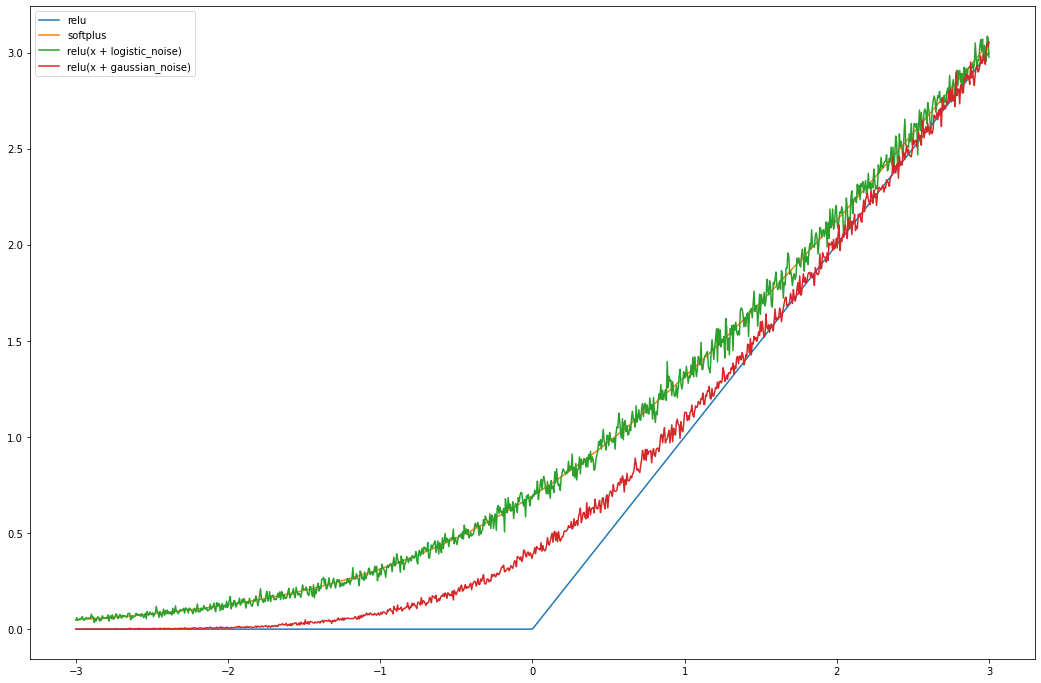

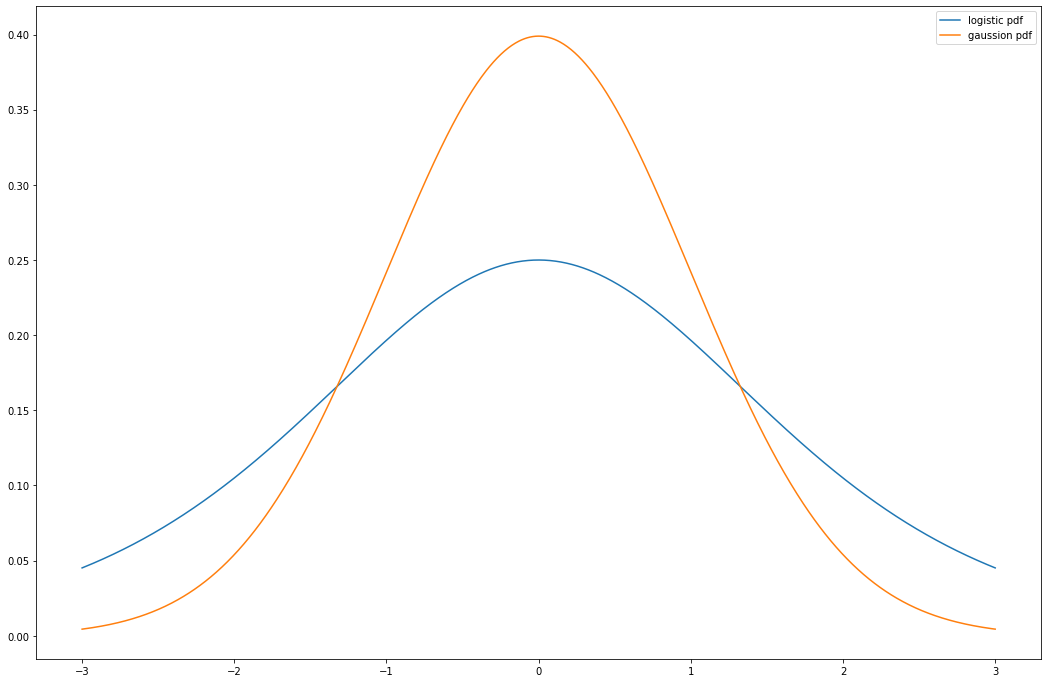

In [24]:
x = np.linspace(-3, 3, 1000)
relu_x_logistic_noise = [np.average([max(0, a_i + logistic_noise()) for idx in range(1000)]) for a_i in x]
relu_x_gaussian_noise = [np.average([max(0, a_i + np.random.randn()) for idx in range(1000)]) for a_i in x]

# [print(logistic_noise()) for i in range(100)]

plt.figure(figsize = (18,12))
plt.plot(x, relu(x), label='relu')
plt.plot(x, np.log(1 + np.exp(x)), label='softplus')
# plt.plot(x, x * sigmoid(x), label='swish')
plt.plot(x, relu_x_logistic_noise, label='relu(x + logistic_noise)')
plt.plot(x, relu_x_gaussian_noise, label='relu(x + gaussian_noise)')

plt.legend()
plt.show()

plt.figure(figsize = (18,12))
# plt.plot(x, sigmoid(x), label='sigmoid')
plt.plot(x, sigmoid(x) * (1 - sigmoid(x)), label='logistic pdf')
plt.plot(x, gaussion(x, 0, 1.0), label='gaussion pdf')

# plt.plot(x, np.exp(-x-np.exp(-x)), label='gubmel pdf')


plt.legend()
plt.show()


In [4]:
p = 0.6224593312018546
alpha = p / (1 - p)
log_alpha = math.log(alpha)
lmd = 0.5
print(p, alpha, log_alpha)

samples = unit_step_func([log_alpha + logistic_noise() for i in range(10000)])
samples_1 = unit_step_func([p - uniform_noise() for i in range(10000)])
samples_2 = [bernoulli_noise(p) for i in range(10000)]

def output_samples(s):
    a = sum(s)
    b = len(s)
    ratio = 1.000 * a / b

    print(p, a, b, ratio)

# output_samples(samples)
# output_samples(samples_1)
output_samples(samples_2)



0.6224593312018546 1.6487212707001284 0.5000000000000001
0.6224593312018546 6224 10000 0.6224


0.24899999999999994 0.23399999999999974
242 0.242
226 0.226


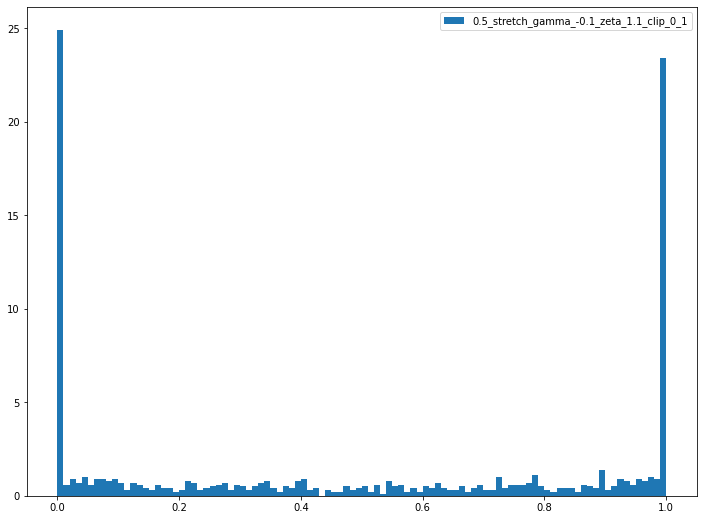

0.23500000000000007 0.25399999999999984
222 0.222
248 0.248


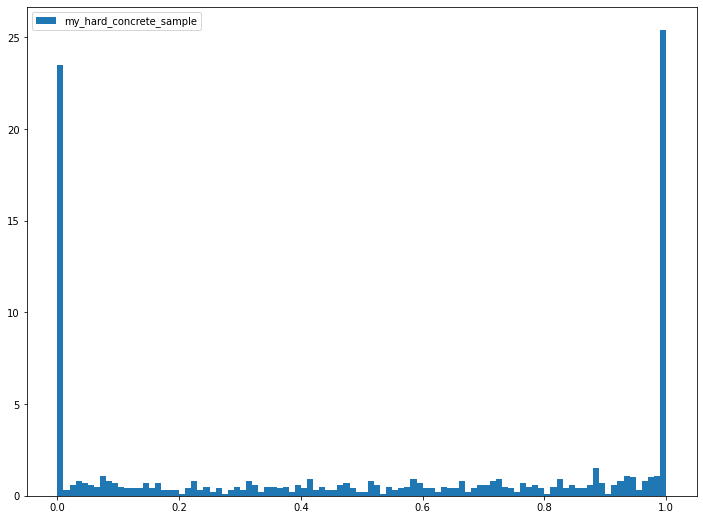

In [24]:
def softmax_temp(log_alpha, lmd):
    G1 = gumbel_noise()
    G2 = gumbel_noise()
    
    a = np.exp((log_alpha + G1) / lmd)
    b = np.exp(G2 / lmd)
    p = a / (a + b)
    
    return p

def plt_samples(s, size, tag):
    
    plt.figure(figsize = (12,9))
#     print(s)
#     n, bins, _ = plt.hist(s, density=True, range=(0,1.0), bins=100, label=tag)
    n, bins, _ = plt.hist(s, density=True, bins=100, label=tag)
    sum_n = sum(n)
    normed_n = n / sum_n
#     print(normed_n)
    print(normed_n[0], normed_n[-1])
#     print(bins)
#     zero_num = sum([1 if math.fabs(x) < 1e-3 else 0 for x in s])
    zero_num = sum([1 if x == 0 else 0 for x in s])

#     one_num = sum([1 if math.fabs(x - 1.0) < 1e-3 else 0 for x in s])
    one_num = sum([1 if x == 1 else 0 for x in s])

    print(zero_num, zero_num * 1.00 / size)
    print(one_num, one_num * 1.00 / size)
    plt.legend()
    plt.show()

def hard_concrete_dist(log_alpha, beta, gamma, zeta, with_noise=True):

    size = 1000
    ####### 1. binary concrere sample
#     samples = [bin_concrete_sample(p, beta) for i in range(size)]
    if with_noise:
        samples = [sigmoid((log_alpha + logistic_noise())/beta) for i in range(size)]
    else:
        samples = [sigmoid(log_alpha/beta) for i in range(size)]

#     plt_samples(samples, size, str(beta) + "_ori")
#     samples_tmp = [softmax_temp(log_alpha, beta) for i in range(size)]
#     plt_samples(samples_tmp, size, str(beta) + "_tmp")

    ####### 2.  stretch to (gamma, zeta)
    samples = [x * (zeta - gamma) + gamma for x in samples]
#     plt_samples(samples, size, str(beta) + "_stretch_gamma_" + str(gamma) + "_zeta_" + str(zeta))
    ####### 3.  hard sigmoid
    samples = np.clip(samples, 0, 1)
    plt_samples(samples, size, str(beta) + "_stretch_gamma_" + str(gamma) + "_zeta_" + str(zeta) + "_clip_0_1")
    return samples

# hard_concrete_dist(log_alpha, 0.5, -0.1, 1.1)
# hard_concrete_dist(log_alpha, 0.1, -0.1, 1.1)

# hard_concrete_dist(log_alpha, 0.1, 0.0, 1.0)

# [hard_concrete_dist(log_alpha, b, 0.0, 1.0) for b in [0.1, 0.2, 0.3, 0.5, 1.0, 1.5, 2.0]]

# # s = hard_concrete_dist(0.0, 0.5, -0.1, 1.1)
# # print(s)
# print(np.average(s))

s1 = hard_concrete_dist(0.0, 0.5, -0.1, 1.1)
# s2 = hard_concrete_dist(0.0, 0.5, 0.0, 1.0)

s3 = [hard_concrete_sample(0.5, 0.5, -0.1, 1.1) for i in range(1000)]
plt_samples(s3, 1000, 'my_hard_concrete_sample')

# s = [bin_concrete_sample(0.8, 0.1) for i in range(10000)]
# # [print(i) for i in s]
# n, bins, _ = plt.hist(s, density=True, bins=10, label='tag')

########################## plot average samples ########################## 
# x = np.linspace(-10, 10, 100)
# y1 = [np.average(hard_concrete_dist(log_alpha, 0.5, -0.1, 1.1, with_noise=True)) for log_alpha in x]
# y1_no_noise = [np.average(hard_concrete_dist(log_alpha, 0.5, -0.1, 1.1, with_noise=False)) for log_alpha in x]

# y2 = [np.average(hard_concrete_dist(log_alpha, 0.5, 0.0, 1.0, with_noise=True)) for log_alpha in x]
# y2_no_noise = [np.average(hard_concrete_dist(log_alpha, 0.5, 0.0, 1.0, with_noise=False)) for log_alpha in x]

# plt.figure(figsize = (12,9))
# # print(list(zip(x,y)))
# plt.plot(x, y2_no_noise, label='concrete no_noise')
# plt.plot(x, y1_no_noise, label='hard concrete no noise')

# plt.plot(x, y2, label='concrete')
# plt.plot(x, y1, label='hard concrete')

# plt.plot(x, sigmoid(x), label='sigmoid')
# plt.legend()
# plt.show()

In [5]:
def bin_concrete_pdf(x, alpha, lmd):
    
    numerator = lmd * alpha * np.power(x * (1 - x), -lmd - 1)
    denominator = alpha * np.power(x, -lmd) + np.power(1 - x, -lmd)
    p = numerator / (denominator * denominator)
    return p

(1e-05, 1350.359165707398)
(0.99999, 2252.5850620160927)


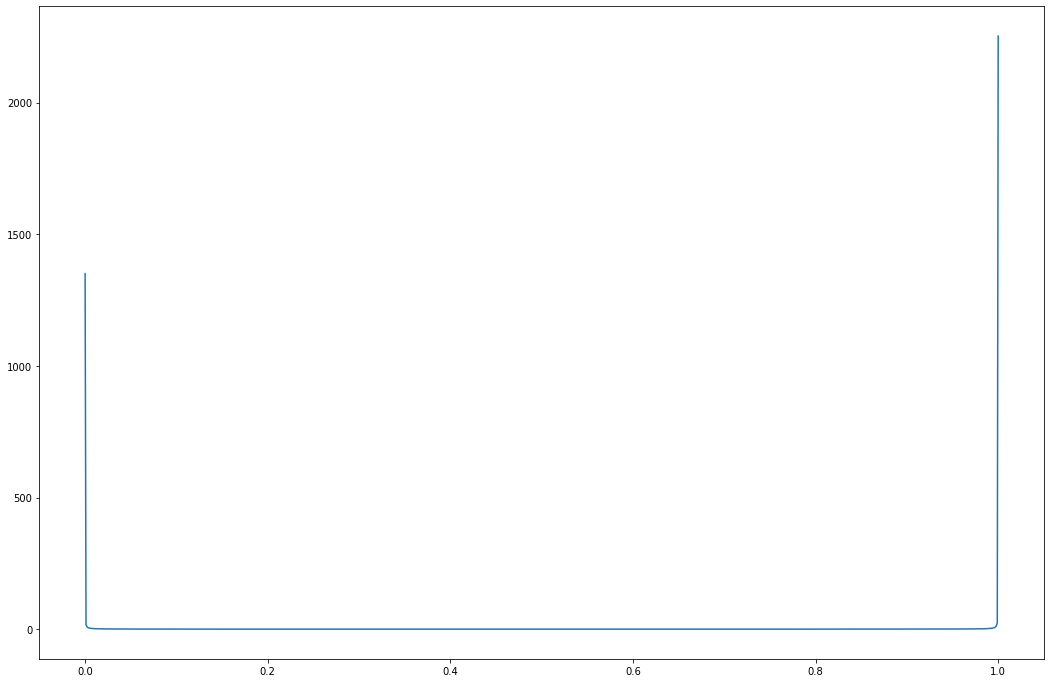

In [12]:
p = 0.6224593312018546
alpha = p / (1 - p)
log_alpha = math.log(alpha)
lmd = 0.1

x = np.linspace(0.00001, 0.99999, 1000)

y = bin_concrete_pdf(x, alpha, lmd)
print(list(zip(x, y))[0])
print(list(zip(x, y))[-1])

plt.figure(figsize = (18,12))
plt.plot(x, y, label='bin_concrete_pdf')
plt.show()